You are required to create a jupyter notebook that contains your results of undertaking the research detailed below. For submission, you should generate PDF/ipynb document. Make sure your PDF/ipynb has rendered correctly before submitting.

You must use the attached dataset. This is a data pre-processing and data preparation task in which you must understand and preprocess your data thoroughly and accurately.

1. Short Introduction about Data set
2. Understanding data and data pre-preprocessing
3. Extract derived features from data
4. Perform data pre-processing
5. Handle categorical data and feature encoding
6. Perform label encoding on data
7. Outlier Detection and Remove outlier from the dataset
8. Select the best feature using the feature selection technique

Note: Don't forget to explain each and every section of the solution as far as possible.

From the selected topic below write 350 words explaining how it could help with the data preprocessing.

1. Data Wrangling
2. Data Cleaning
3. Data integration
4. Data Reduction
5. Data Transformation

Your work needs to be fully referenced, which is good practice for your dissertation.


## Import the required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

## Import dataset as dataframe
`pip install openpyxl`<br>
`data_frame = pd.read_excel('./airlines_dataset.xlsx', engine='openpyxl')`

In [2]:
data_frame = pd.read_excel('./airlines_dataset.xlsx')

In [3]:
data_frame.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Shape of the dataframe

In [4]:
data_frame.shape

(10683, 11)

## Handling Missing Value

In [5]:
## kun col ma xa missing value
data_frame.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price              False
dtype: bool

### missing value in `Route` & `Total_stops`

In [6]:
## kati kati ota value xa
data_frame.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
data_frame.dropna(inplace = True)

In [8]:
data_frame.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Types of feature in our `data_frame`

In [9]:
data_frame.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## This is recommended

In [10]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [11]:
data_frame.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Change columns which is object to date time format

In [12]:
def change_object_to_datetime(df, col):
    df[col] = pd.to_datetime(df[col])

In [13]:
data_frame.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    print(i)
    change_object_to_datetime(data_frame, i)

Date_of_Journey
Dep_Time
Arrival_Time


In [15]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


## Make Columns for `Journey_Day` & `Journey_Month` from 'data_frame' `Date_of_Journey`

In [16]:
data_frame['Journey_Day'] = data_frame['Date_of_Journey'].dt.day
data_frame['Journey_Month'] = data_frame['Date_of_Journey'].dt.month

## Dropping `Date_of_Journey` from `data_frame`
### `axis = 1` => column
### `inplace = True` => modify in original `data_frame` || overwrites

In [17]:
data_frame.drop('Date_of_Journey', axis = 1, inplace = True)
data_frame.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-07-07 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-07-07 05:50:00,2021-07-07 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-07-07 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-07-07 18:05:00,2021-07-07 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-07-07 16:50:00,2021-07-07 21:35:00,4h 45m,1 stop,No info,13302,3,1


## Extract Hour and Minute from `Dep_Time` & `Arrival_Time` using `extract_hour` function

In [18]:
def extract_hour(df, col):
    df[col+'_Hour'] = df[col].dt.hour

def extract_minute(df, col):
    df[col+'_Minute'] = df[col].dt.minute

### Passing `argument` => function `paramater` by calling `extract_hour` function

In [19]:
extract_hour(data_frame, 'Dep_Time')
extract_minute(data_frame, 'Dep_Time')

extract_hour(data_frame, 'Arrival_Time')
extract_minute(data_frame, 'Arrival_Time')

In [20]:
data_frame.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-07-07 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-07-07 05:50:00,2021-07-07 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-07-07 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-07-07 18:05:00,2021-07-07 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-07-07 16:50:00,2021-07-07 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


## Dropping `Dep_Time` & `Arrival_Time` using `drop_column` function

In [21]:
def drop_column(df, col):
    df.drop(col, axis = 1, inplace = True)

### Passing `argument` => function `paramater` by calling `drop_column` function

In [22]:
drop_column(data_frame, 'Dep_Time')
drop_column(data_frame, 'Arrival_Time')

In [23]:
data_frame.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


## Preprocessing `Duration` column

In [24]:
# Making list of `Duration` column
duration = list(data_frame['Duration'])

In [25]:
duration

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [26]:
duration[1].split(' ')

['7h', '25m']

In [27]:
len(duration[1].split(' '))

2

### for all the `duration` list
        if after ' ' split == 2 => pass
        
        else
            if: 'h' only in duration
                append ' 0m' after that 'h' in duration column's row
            else: (m) only in duration
                append '0h ' before that 'h' in duration column's row

In [28]:
for i in range(len(duration)):
    if len(duration[i].split(' ')) == 2:
        pass

    else:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]  

In [29]:
## assign list ot the 'data_frame' column again
data_frame['Duration'] = duration

In [30]:
data_frame.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


## Separate `hour_minute_from_duration`

In [31]:
# Examples 4 cells below
duration[1]

'7h 25m'

In [32]:
duration[1].split(' ')

['7h', '25m']

In [33]:
duration[1].split(' ')[0][:-1]

'7'

In [34]:
duration[1].split(' ')[1][:-1]

'25'

In [35]:
# function for splitting hour and minute using (split) and index from the (list) 
def hour(x):
    return x.split(' ')[0][:-1]
def minute(x):
    return x.split(' ')[1][:-1]

In [36]:
# Applying to `Duration` column with respective split function & 
# Creating new column in `data_frame` called 'Duration_hour' 'Duration_minute'
data_frame['Duration_hour'] = data_frame['Duration'].apply(hour)
data_frame['Duration_minute'] = data_frame['Duration'].apply(minute)

In [37]:
data_frame.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [38]:
# Now, Drop the `Duration` column function
def drop_column(df, col):
    df.drop(col, axis = 1, inplace = True)

In [39]:
drop_column(data_frame, 'Duration')

In [40]:
data_frame.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [41]:
data_frame.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_Day             int64
Journey_Month           int64
Dep_Time_Hour           int64
Dep_Time_Minute         int64
Arrival_Time_Hour       int64
Arrival_Time_Minute     int64
Duration_hour          object
Duration_minute        object
dtype: object

In [42]:
# Type casting object string to integer in columns 'Duration_hour' & 'Duration_minute' &
# assigned to the same respective columns
data_frame['Duration_hour'] = data_frame['Duration_hour'].astype('int')
data_frame['Duration_minute'] = data_frame['Duration_minute'].astype('int')

In [43]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Route                10682 non-null  object
 4   Total_Stops          10682 non-null  object
 5   Additional_Info      10682 non-null  object
 6   Price                10682 non-null  int64 
 7   Journey_Day          10682 non-null  int64 
 8   Journey_Month        10682 non-null  int64 
 9   Dep_Time_Hour        10682 non-null  int64 
 10  Dep_Time_Minute      10682 non-null  int64 
 11  Arrival_Time_Hour    10682 non-null  int64 
 12  Arrival_Time_Minute  10682 non-null  int64 
 13  Duration_hour        10682 non-null  int32 
 14  Duration_minute      10682 non-null  int32 
dtypes: int32(2), int64(7), object(6)
memory usage: 1.2+ M

In [44]:
# List Comprehension
# In each columns of data_frame if columns type is
# O => Object
# Assign to 'categorical_col'
categorical_col = [col for col in data_frame.columns if data_frame[col].dtype == 'O']

In [45]:
categorical_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [46]:
# List Comprehension
# In each columns of data_frame if columns type is not equal to
# O => Object
# Assign to 'categorical_col'
integer_col = [col for col in data_frame.columns if data_frame[col].dtype != 'O']

In [47]:
integer_col

['Price',
 'Journey_Day',
 'Journey_Month',
 'Dep_Time_Hour',
 'Dep_Time_Minute',
 'Arrival_Time_Hour',
 'Arrival_Time_Minute',
 'Duration_hour',
 'Duration_minute']

In [48]:
# Fruit = 'Mango', 'Orange', 'Apple' => One Hot Encoding => for multiple categorical data

# Country = 'Nepal', 'China' => Labelling => for only two categorical data

In [49]:
categorical_data = data_frame[categorical_col]
categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [50]:
categorical_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

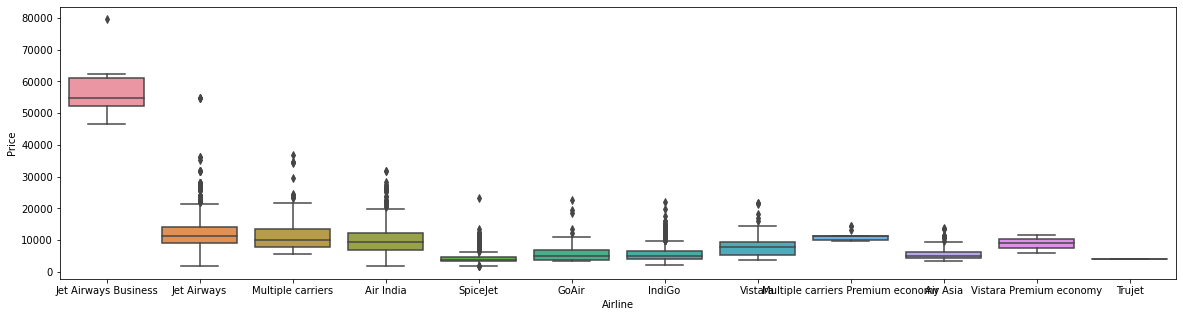

In [51]:
plt.figure(figsize= (20, 5))
sns.boxplot(x= 'Airline', y= 'Price', data= data_frame.sort_values('Price', ascending= False))

## Perform One Hot Encoding

In [52]:
# For 'Airline' Column in 'categorical_data' using 'get_dummies'
# drop_first= True => drops column
Airline = pd.get_dummies(categorical_data['Airline'], drop_first= True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


### For 'Source' Column in 'categorical_data' using 'get_dummies'

In [53]:
categorical_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [54]:
# drop_first= True => drops column
Source = pd.get_dummies(categorical_data['Source'], drop_first= True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


### For 'Destination' Column in 'categorical_data' using 'get_dummies'

In [55]:
categorical_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [56]:
# drop_first= True => drops column
Destination = pd.get_dummies(categorical_data['Destination'], drop_first= True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


### ### For 'Route' Column in 'categorical_data'

In [57]:
categorical_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [58]:
# Route => string then split using '→' & extract each indexes
categorical_data['Route_01'] = categorical_data['Route'].str.split('→').str[0]
categorical_data['Route_02'] = categorical_data['Route'].str.split('→').str[1]
categorical_data['Route_03'] = categorical_data['Route'].str.split('→').str[2]
categorical_data['Route_04'] = categorical_data['Route'].str.split('→').str[3]
categorical_data['Route_05'] = categorical_data['Route'].str.split('→').str[4]

<ipython-input-58-15ac54566d02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['Route_01'] = categorical_data['Route'].str.split('→').str[0]
<ipython-input-58-15ac54566d02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['Route_02'] = categorical_data['Route'].str.split('→').str[1]
<ipython-input-58-15ac54566d02>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [59]:
categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_01,Route_02,Route_03,Route_04,Route_05
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [60]:
# Dropping `Route`
categorical_data.drop('Route', axis= 1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [61]:
categorical_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_01,Route_02,Route_03,Route_04,Route_05
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [62]:
categorical_data.isna().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_01               0
Route_02               0
Route_03            3491
Route_04            9116
Route_05           10636
dtype: int64

In [63]:
# dropping nan values
for i in ['Route_03', 'Route_04', 'Route_05']:
    categorical_data[i].fillna('None', inplace= True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [64]:
categorical_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_01,Route_02,Route_03,Route_04,Route_05
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,None,None


In [65]:
# counting the categorical values in all columns
for i in categorical_data.columns:
    print('{} → {} categories'.format(i, len(categorical_data[i].value_counts())))

Airline → 12 categories
Source → 5 categories
Destination → 6 categories
Total_Stops → 5 categories
Additional_Info → 10 categories
Route_01 → 5 categories
Route_02 → 45 categories
Route_03 → 30 categories
Route_04 → 14 categories
Route_05 → 6 categories


In [66]:
categorical_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_01', 'Route_02', 'Route_03', 'Route_04', 'Route_05'],
      dtype='object')

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
encoder = LabelEncoder()

In [69]:
for i in ['Route_01', 'Route_02', 'Route_03', 'Route_04', 'Route_05']:
    categorical_data[i] = encoder.fit_transform(categorical_data[i])

<ipython-input-69-bf0fe0f3cfb8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data[i] = encoder.fit_transform(categorical_data[i])


In [70]:
categorical_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_01,Route_02,Route_03,Route_04,Route_05
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


### For 'Total_Stops' Column in 'categorical_data'

In [71]:
categorical_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [72]:
## making dictionary & mapping using key : value pair 

In [73]:
dict_stop = {'non-stop' : 0,
            '1 stop' : 1,
            '2 stops' : 2,
            '3 stops' : 3,
            '4 stops' : 4}

In [74]:
dict_stop

{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}

### dictionary to data_frame => using .map()

In [75]:
categorical_data['Total_Stops'] = categorical_data['Total_Stops'].map(dict_stop)

<ipython-input-75-94577825af4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['Total_Stops'] = categorical_data['Total_Stops'].map(dict_stop)


In [76]:
categorical_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_01,Route_02,Route_03,Route_04,Route_05
0,IndiGo,Banglore,New Delhi,0,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,No info,0,34,8,13,5


### For 'Additional_Info' Column in 'categorical_data'

In [77]:
categorical_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [78]:
categorical_data.drop('Additional_Info', axis= 1, inplace= True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [79]:
categorical_data.head()

,Airline,Source,Destination,Total_Stops,Route_01,Route_02,Route_03,Route_04,Route_05
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


# Concat columns

In [80]:
data_frame.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [81]:
data_frame = pd.concat([categorical_data, Airline, Source, Destination, data_frame[integer_col]], axis= 1)

In [82]:
data_frame.head()

,Airline,Source,Destination,Total_Stops,Route_01,Route_02,Route_03,Route_04,Route_05,Air India,...,New Delhi,Price,Journey_Day,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302,3,1,16,50,21,35,4,45


In [83]:
data_frame.drop(['Airline', 'Source', 'Destination'], axis= 1, inplace= True)

In [84]:
data_frame.head()

,Total_Stops,Route_01,Route_02,Route_03,Route_04,Route_05,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Journey_Day,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_minute
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


In [85]:
pd.set_option('display.max_columns', 35)

In [86]:
data_frame.head()

,Total_Stops,Route_01,Route_02,Route_03,Route_04,Route_05,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_Day,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_minute
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


## Oulier Detection

In [87]:
def plot(df, col):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    sns.displot(df[col], ax = ax1)
    sns.boxplot(df[col], ax = ax2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


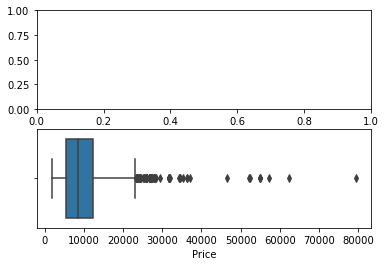

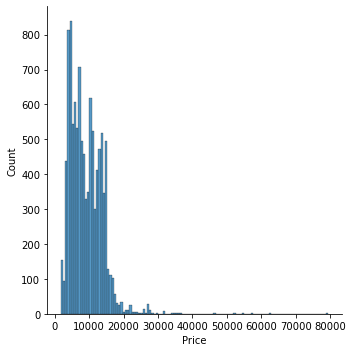

In [88]:
plot(data_frame, 'Price')

In [89]:
data_frame['Price'] = np.where(data_frame['Price'] >= 40000, data_frame['Price'].median(), data_frame['Price'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


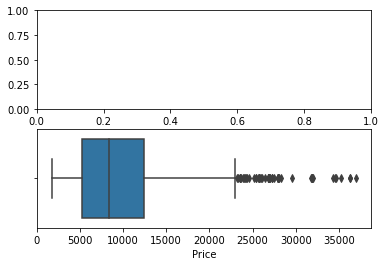

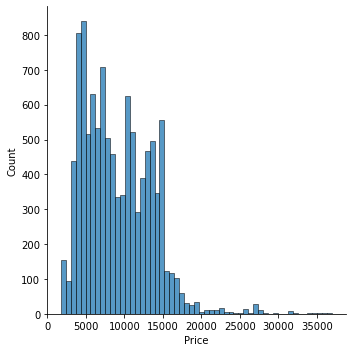

In [90]:
plot(data_frame, 'Price')

## Feature selection

#### Seperate independent & Dependent Variables

In [91]:
X_data = data_frame.drop('Price', axis= 1)
X_data.head()

,Total_Stops,Route_01,Route_02,Route_03,Route_04,Route_05,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_Day,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_minute
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [92]:
# X => 2-D data => matrix
X_data.shape

(10682, 34)

In [93]:
y_data = data_frame['Price']
y_data.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [94]:
# y => 1-D => vector
y_data.shape

(10682,)

### Apply Feature Selection Technique

In [95]:
from sklearn.feature_selection import mutual_info_classif

In [96]:
my_data = mutual_info_classif(X_data, y_data)
my_data

array([2.14590269, 2.02787198, 2.79021593, 2.2890135 , 1.46714908,
       0.76730621, 0.77497527, 0.09362225, 0.66828561, 0.92168614,
       0.01395418, 0.55629281, 0.01248965, 0.31894771, 0.        ,
       0.23131199, 0.00857609, 0.17154744, 1.55568946, 0.88094415,
       0.29036875, 1.51538816, 0.40286257, 0.28661915, 0.16144851,
       0.36742374, 1.06981763, 0.85611029, 1.42034904, 1.21011045,
       1.8452413 , 1.5540212 , 1.78009937, 1.07372477])

In [97]:
imp = pd.DataFrame(my_data, index= X_data.columns)
imp

,0
Total_Stops,2.145903
Route_01,2.027872
Route_02,2.790216
Route_03,2.289014
Route_04,1.467149
Route_05,0.767306
Air India,0.774975
GoAir,0.093622
IndiGo,0.668286
Jet Airways,0.921686


In [98]:
imp.columns = ['Important Ranks']
imp

,Important Ranks
Total_Stops,2.145903
Route_01,2.027872
Route_02,2.790216
Route_03,2.289014
Route_04,1.467149
Route_05,0.767306
Air India,0.774975
GoAir,0.093622
IndiGo,0.668286
Jet Airways,0.921686


In [99]:
imp.sort_values(by= 'Important Ranks', ascending= False)

,Important Ranks
Route_02,2.790216
Route_03,2.289014
Total_Stops,2.145903
Route_01,2.027872
Arrival_Time_Hour,1.845241
Duration_hour,1.780099
Delhi,1.555689
Arrival_Time_Minute,1.554021
Cochin,1.515388
Route_04,1.467149
